In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Analysis of Coal Price between 2001-202 #
Dataset source: https://www.kaggle.com/datasets/fuarresvij/coal-price-2001-2021?resource=download

The dataset includes price information of coal from energy company BP.

In [137]:
df = pd.read_csv('coal-prices.csv') #create a pandas dataframe
df

,Entity,Code,Year,Coal - Prices
0,Asian marker price (BP),NaN,2001,36.894600
1,Asian marker price (BP),NaN,2002,30.406666
2,Asian marker price (BP),NaN,2003,36.529198
3,Asian marker price (BP),NaN,2004,72.416664
4,Asian marker price (BP),NaN,2005,61.840000
...,...,...,...,...
142,US Central Appalachian coal spot price index (BP),NaN,2017,63.825291
143,US Central Appalachian coal spot price index (BP),NaN,2018,72.844009
144,US Central Appalachian coal spot price index (BP),NaN,2019,57.163982
145,US Central Appalachian coal spot price index (BP),NaN,2020,42.766369


The dataframe has 4 columns and an index. **Entity** is the source/location of the coal. **Code** is the 'code of production'. **Year** displays the year of the price, and **Coal - Prices** tells the price of coal in USD per tonne.

The **Code** column is full of NaNs, and it doesn't seem to be very important (it most likely would have contained some sort of ID that the index can easily handle) so we can drop that. We can also rename **Coal - Prices** into **Coal-Prices** to make it shorter and faster to type.

In [138]:
del df['Code'] #delete the Code column
df = df.rename(columns={'Coal - Prices': 'Coal-Prices'}) #rename column for easier reading in future
df

,Entity,Year,Coal-Prices
0,Asian marker price (BP),2001,36.894600
1,Asian marker price (BP),2002,30.406666
2,Asian marker price (BP),2003,36.529198
3,Asian marker price (BP),2004,72.416664
4,Asian marker price (BP),2005,61.840000
...,...,...,...
142,US Central Appalachian coal spot price index (BP),2017,63.825291
143,US Central Appalachian coal spot price index (BP),2018,72.844009
144,US Central Appalachian coal spot price index (BP),2019,57.163982
145,US Central Appalachian coal spot price index (BP),2020,42.766369


## Overview of the data ##

In [139]:
the_ent = pd.unique(df.Entity)
print(len(the_ent))
print(the_ent)

7
['Asian marker price (BP)' 'China Qinhuangdao spot price (BP)'
 'Japan coking coal import CIF price (BP)'
 'Japan steam coal import CIF price (BP)'
 'Japan steam spot CIF price (BP)' 'Northwest Europe marker price (BP)'
 'US Central Appalachian coal spot price index (BP)']


There are 7 unique entities in the dataset who have their own set prices. Now, looking at the overall average price of coal per each entity...

In [140]:
df1 = pd.DataFrame(data=df, columns=['Entity', 'Coal-Prices'])
df_ent = df1.groupby('Entity').mean().reset_index()
df_ent

,Entity,Coal-Prices
0,Asian marker price (BP),83.944344
1,China Qinhuangdao spot price (BP),80.131865
2,Japan coking coal import CIF price (BP),120.079834
3,Japan steam coal import CIF price (BP),88.662885
4,Japan steam spot CIF price (BP),85.779958
5,Northwest Europe marker price (BP),76.542696
6,US Central Appalachian coal spot price index (BP),62.260257


Over the 20 years, the **Japan coking coal import CIF** has had the highest average price, and the **US Central Appalachian coal spot** has had the lowest average price.

Looking at the average prices per year...

In [141]:
df2= pd.DataFrame(data=df, columns=['Year', 'Coal-Prices'])
df_year = df2.groupby('Year').mean().reset_index()
df_year

,Year,Coal-Prices
0,2001,39.264029
1,2002,34.119481
2,2003,38.045251
3,2004,62.675577
4,2005,65.815172
5,2006,64.805783
6,2007,76.857225
7,2008,139.690853
8,2009,94.186808
9,2010,106.925704


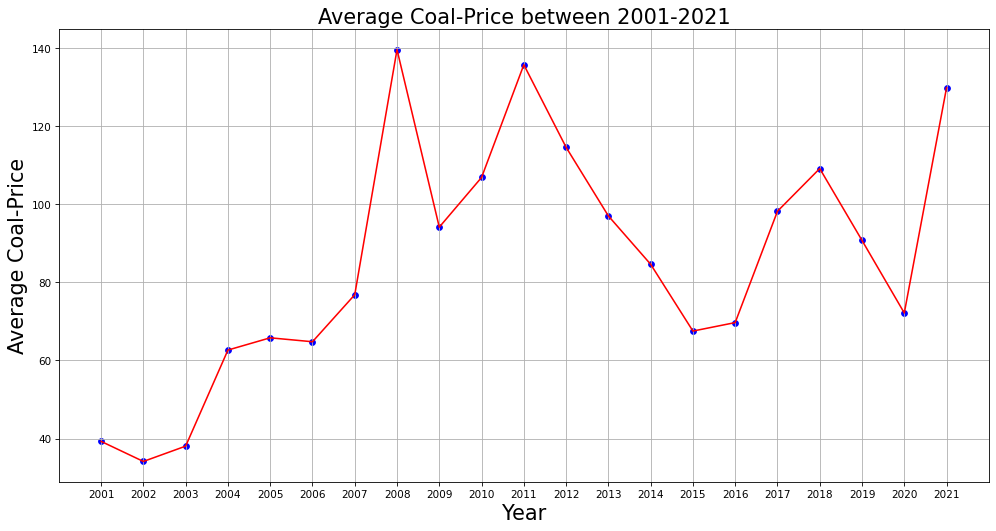

In [142]:
fig = plt.figure(figsize=(16, 8), dpi=75)
#'fig' contains the plot of the overall average price

plt.scatter(x=df_year.Year, y=df_year['Coal-Prices'], color='b', s=30)
plt.plot(df_year.Year, df_year['Coal-Prices'], color='r')
plt.xticks(np.arange(2001,2022, 1))
plt.xlabel('Year', size=20)
plt.ylabel('Average Coal-Price', size=20)
plt.title('Average Coal-Price between 2001-2021', size=20)
plt.grid()

plt.show()

The plot above shows an overall increase in coal price between the years 2001 and 2021. There are 2 massives jumps in price for th years 2008 and 2021, which are likely due to the 2008 recession and the recent Covid-19 pandemic, respectively. 

While this plot shows the overall price among the 7 entities, the plots for each unique entity may have a slightly different appearance. In particular, I predict that the plots for the entites located in Japan will have a more pronounced hike in coal-price for the year 2011, due to the tsunami that took place that year.

## Data per individual Entities ##

Below are plots showing the coal prices for each individual enitity over the 20 year period. I created 2 functions to track the data:
1. **graph_maker()** will output a single plot of the titled entity's prices over time
1. **multi_plot()** will output a sinlge plot comparing the prices between the specific entity and the overall average

In [143]:
def graph_maker(dataf):
    plt.figure(figsize=(12, 6), dpi=75)
    plt.scatter(x=dataf.Year, y=dataf['Coal-Prices'], color= 'r', s=20)
    plt.plot(dataf.Year, dataf['Coal-Prices'], color='b')
    plt.xticks(np.arange(2001,2022, 1))
    plt.xlabel('Year', size=20)
    plt.ylabel('Coal-Price', size=20)
    plt.grid()
    return plt.gca()


def multi_plot(dataf):
    xaxis = np.arange(2001,2022,1)
    
    plt.figure(figsize=(16, 8), dpi=75)
    
    #plot the specific entity's data
    plt.scatter(x=dataf.Year, y=dataf['Coal-Prices'], s=30, color='b')
    plt.plot(dataf.Year, dataf['Coal-Prices'], color='b', label=dataf._get_value(0,'Entity'))
    
    #plot the overall average data
    plt.scatter(x=df_year.Year, y=df_year['Coal-Prices'], s=30, color='r')
    plt.plot(df_year.Year, df_year['Coal-Prices'], color='r', label='Overall Average')
    
    plt.xticks(xaxis)
    plt.xlabel('Year', size=20)
    plt.ylabel('Coal-Price', size=20)
    plt.grid()
    plt.legend()
    
    return plt.gca()

Plot all the above graphs onto the same. Also, create an overall line-of-best fit through 2030.

### Asian marker ###

Text(0.5, 1.0, 'Asian marker price (BP)')

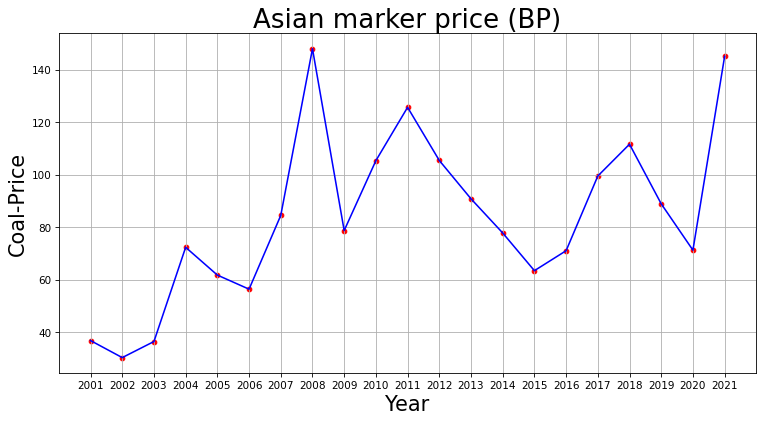

In [144]:
dfAsian = df.loc[df['Entity'] == 'Asian marker price (BP)']
AsianMP = graph_maker(dfAsian)
plt.title("Asian marker price (BP)", size=25)

Text(0.5, 1.0, 'Asian marker price VS. Overall Average')

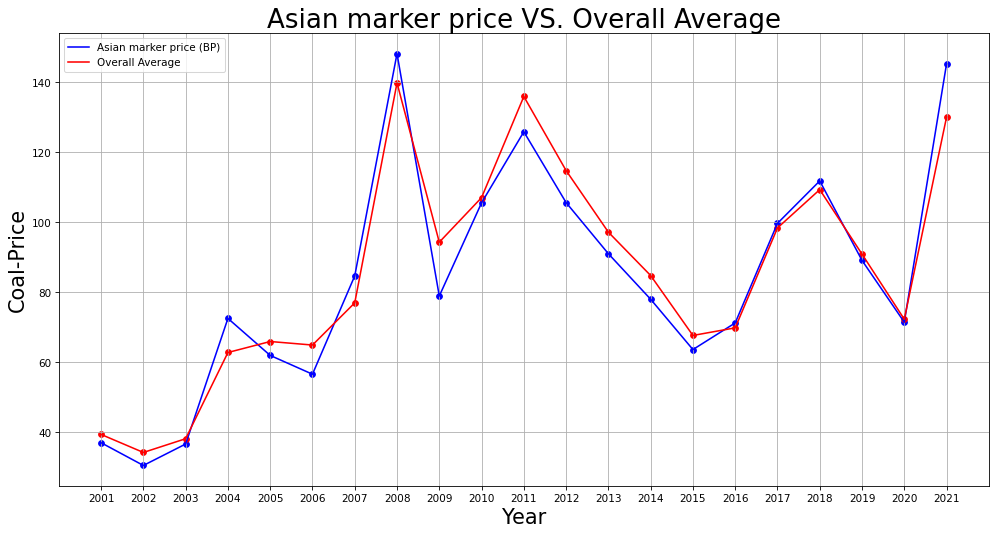

In [145]:
multi_plot(dfAsian)
plt.title("Asian marker price VS. Overall Average", size=25)

It appears that the Asian marker price follows the Overall Average price patterns and does not deviate too much.

### China Qinhuangdao spot  ###

Text(0.5, 1.0, 'China Qinhuangdao spot price (BP)')

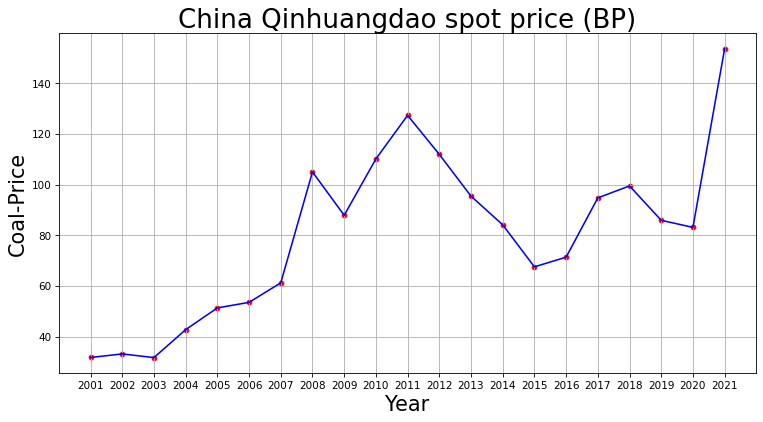

In [146]:
dfChina= df.loc[df['Entity'] == 'China Qinhuangdao spot price (BP)']
ChinaQ = graph_maker(dfChina)
plt.title("China Qinhuangdao spot price (BP)", size=25)

KeyError: 0

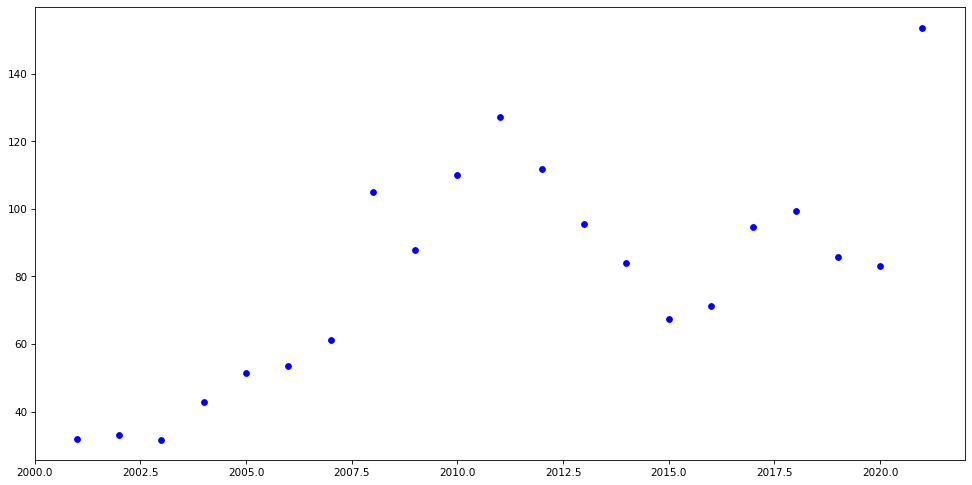

In [147]:
multi_plot(dfChina)
#plt.title("China Qinhuangdao spot price VS. Overall Average", size=25)

#### Japan coking coal import CIF  ####

Text(0.5, 1.0, 'Japan coking coal import CIF price (BP)')

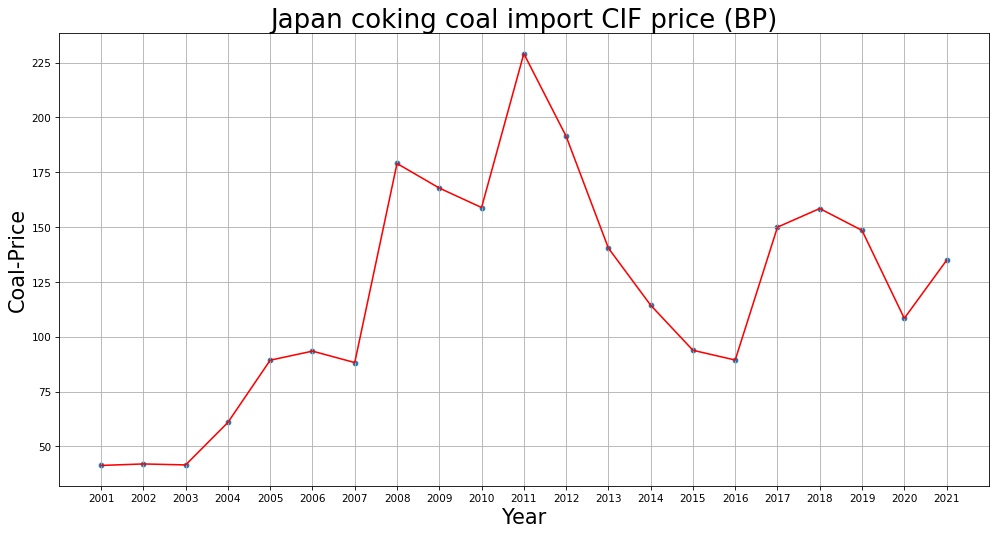

In [78]:
dfJPcc = df.loc[df['Entity'] == 'Japan coking coal import CIF price (BP)']
JPcoco = graph_maker(dfJPcc)
plt.title("Japan coking coal import CIF price (BP)", size=25)

#### Japan steam coal import CIF ####

Text(0.5, 1.0, 'Japan steam coal import CIF price (BP)')

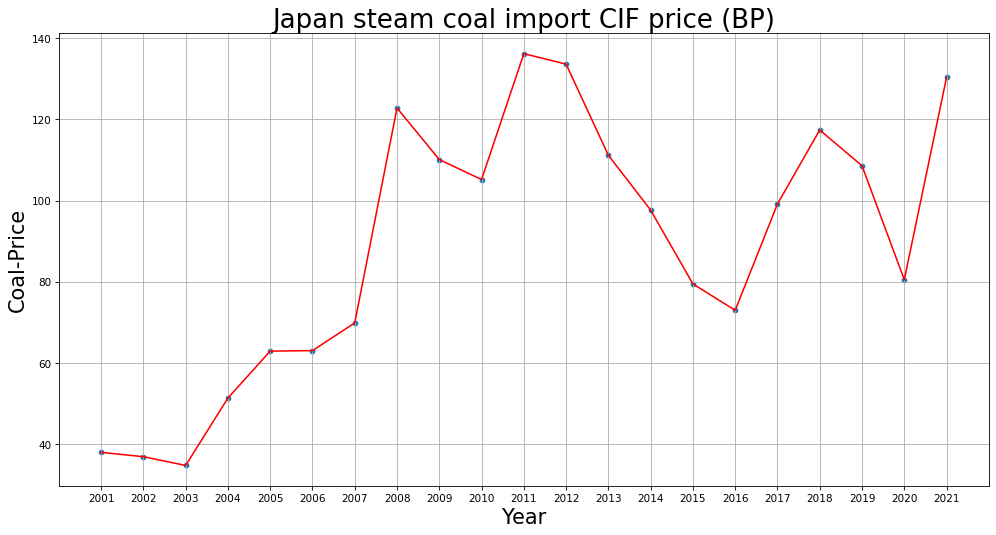

In [79]:
dfJPsc = df.loc[df['Entity'] == 'Japan steam coal import CIF price (BP)']
JPstcoal = graph_maker(dfJPsc)
plt.title("Japan steam coal import CIF price (BP)", size=25)

#### Japan steam spot CIF ####

Text(0.5, 1.0, 'Japan steam spot CIF price (BP)')

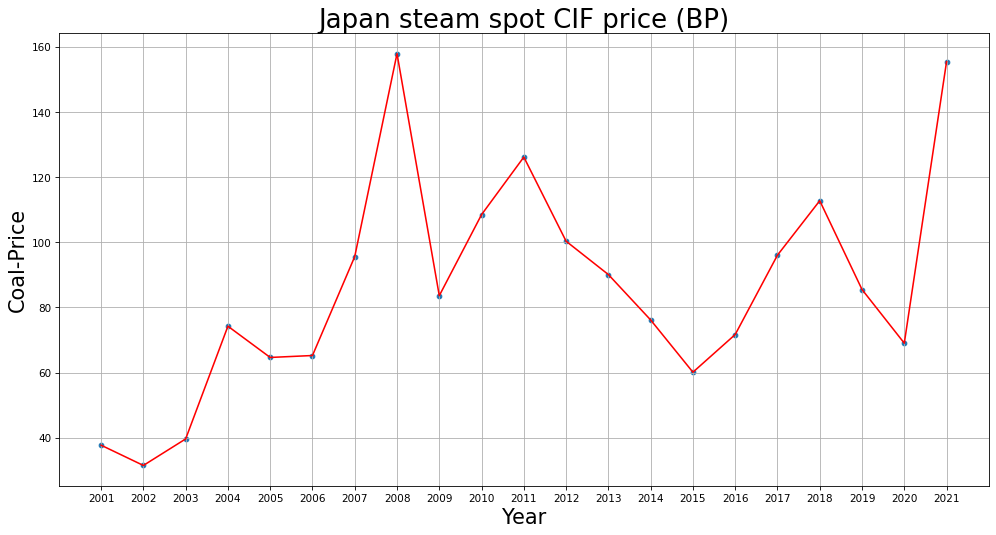

In [80]:
dfJPss = df.loc[df['Entity'] == 'Japan steam spot CIF price (BP)']
JPstspot = graph_maker(dfJPss)
plt.title("Japan steam spot CIF price (BP)", size=25)

#### Northwest Europe marker price ####

Text(0.5, 1.0, 'Northwest Europe marker price (BP)')

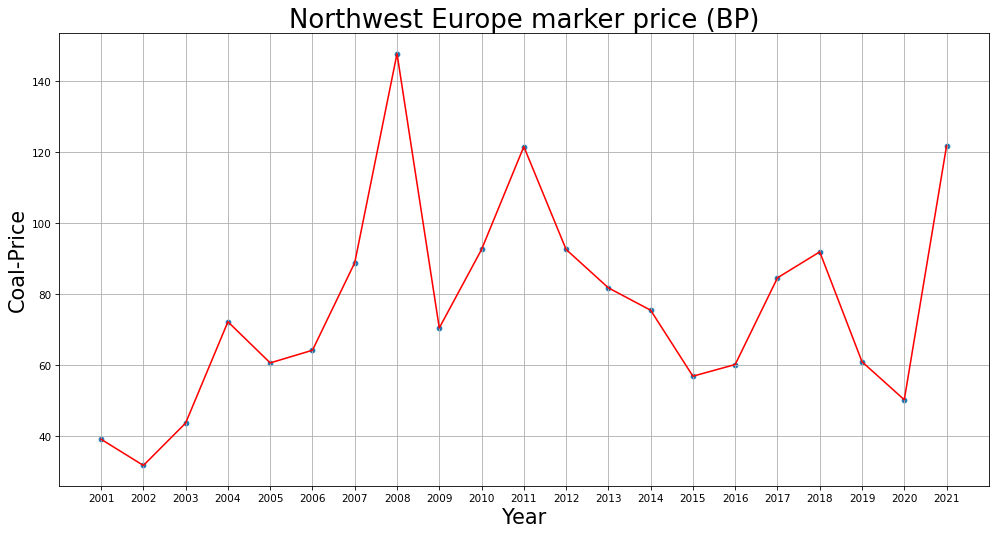

In [81]:
dfNE = df.loc[df['Entity'] == 'Northwest Europe marker price (BP)']
nwEuro = graph_maker(dfNE)
plt.title("Northwest Europe marker price (BP)", size=25)

#### US Central Appalachian coal spot ####

Text(0.5, 1.0, 'US Central Appalachian coal spot price index (BP)')

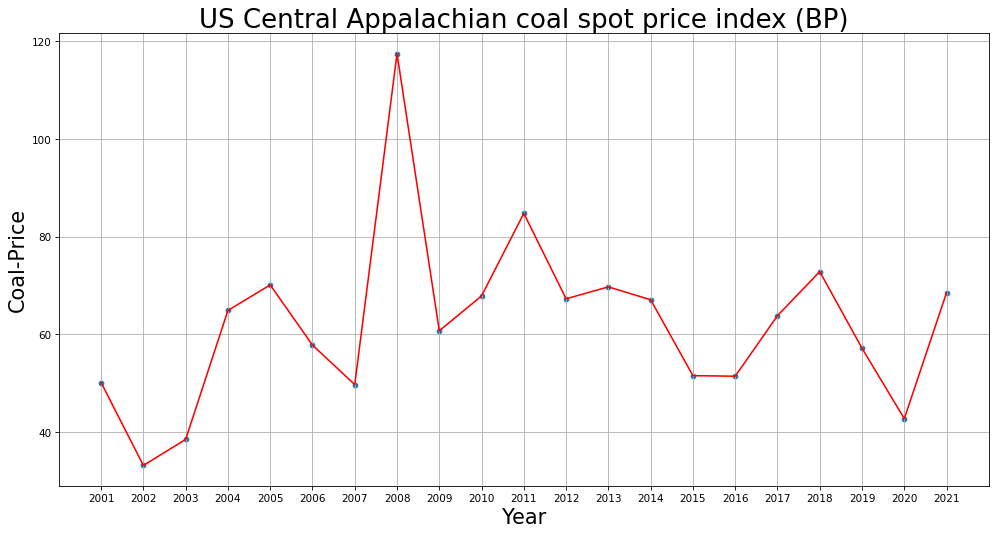

In [82]:
dfUS= df.loc[df['Entity'] == 'US Central Appalachian coal spot price index (BP)']
USCA = graph_maker(dfUS)
plt.title("US Central Appalachian coal spot price index (BP)", size=25)